# 1.4 Máquinas de soporte vectorial 


Las máquinas de soporte vectorial son un conjunto de métodos de aprendizaje supervisado usados para clasificación, regresión y detección de puntos atípicos. Tiene como ventajas:


*   Efectivo en espacios de alta dimensión, aún cuando el número de la dimensión es mayor que el número de la muestra.
*   Utiliza puntos de entrenamiento, llamados vectores de soporte, lo que hace más eficiente el uso de la memoria. 
*   Versátil: se pueden especificar diferentes funciones del Kernel para la función de decisión, incluso un Kernel personalizado.

Entre las desventajas se tiene:

*   Si el número de funciones es mucho mayor que el número de muestras, es crucial evitar el sobre ajuste al elegir las funciones del núcleo y el término de regularización.
*   No proporcionan directamente estimaciones de probabilidad, estas se calculan mediante una costosa validación cruzada 










## 1.4.1 Clasificación

SVC, NuSVC y LinearSVC son clases capaces de realizar una clasificación binaria y multiclase en un conjunto de datos.
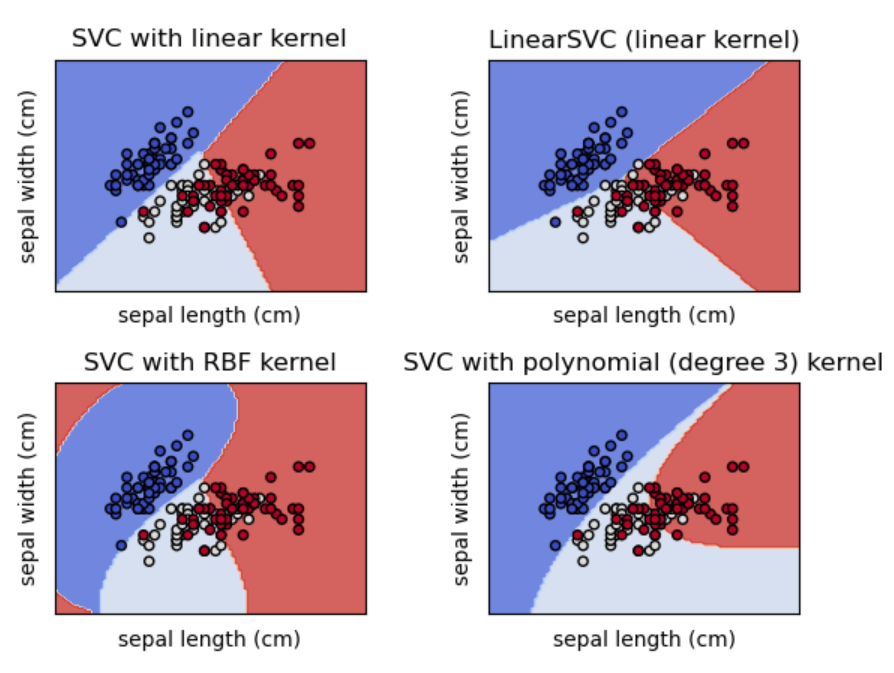





    




SVC y NuSVC son métodos similares, pero aceptan conjuntos de parámetros ligeramente diferentes y tienen formulaciones matemáticas diferentes.
LinearSVC es otra implementación Support Vector Classification para el caso de un kernel lineal.  LinearSVC no acepta kernel de parámetros, ya que se supone que es lineal. También carece de algunos de los atributos de SVC y NuSVC, como support_.

Como otros clasificadores, SVC, NuSVC y LinearSVC toman como entrada dos arreglos: un arreglo X de forma (n_muestras, n_características) que contiene las muestras de entrenamiento, y un arreglo y de etiquetas de clase (cadenas o números enteros), de forma (n_muestras):


In [ ]:
from sklearn import svm
X = [[0, 0], [1, 1]]
y = [0, 1]


In [ ]:
clf = svm.SVC()
clf.fit(X, y)

SVC()

Después de ajustar el modelo con las entradas X y la salida entrenada, el modelo puede ser usado para predecir nuevas variables 

In [ ]:
clf.predict([[2, 2]])

array([1])

Las funciones de decisión de las SVMs dependen en algunos subsets de los datos de entrenamiento, llamados vectores de soporte. Algunas propiedades de esos vectores de soporte pueden ser encontradas en los atributos **support_vectors_**, **support_** y **n_support_**:

In [ ]:
# get support vectors
clf.support_vectors_

array([[0., 0.],
       [1., 1.]])

In [ ]:
# get indices of support vectors
clf.support_



array([0, 1], dtype=int32)

In [ ]:
# get number of support vectors for each class
clf.n_support_

array([1, 1], dtype=int32)

### Examples
SVM:[ Maximum margin separating hyperplane,](https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py)

[Non-linear SVM](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html#sphx-glr-auto-examples-svm-plot-svm-nonlinear-py)

SVM-Anova: [SVM with univariate feature selection,](https://scikit-learn.org/stable/auto_examples/svm/plot_svm_anova.html#sphx-glr-auto-examples-svm-plot-svm-anova-py)

### 1.4.1.1 Clasificación multiclase

SVC y NuSVC implementan el enfoque "uno contra uno" para la clasificación de clases múltiples. En total, se construyen `n_classes * (n_classes - 1) / 2` clasificadores y cada uno entrena datos de dos clases.




Para proveer una interfaz consistente con otros clasificadores, hay que utilizar el modelo SVC con el parámetro `decision_function_shape` establecido en `ovo`. Esto permite la transformación monolítica de resultados de los clasificadores `ovo` "one versus one" a la función de decisión `ovr` "one versus rest" de la forma `(n_samples, n_classes)`.

In [ ]:
X = [[0], [1], [2], [3]]
Y = [0, 1, 2, 3]
clf = svm.SVC(decision_function_shape='ovo')
clf.fit(X, Y)


SVC(decision_function_shape='ovo')

In [ ]:
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes: 4*3/2 = 6

6

In [ ]:
clf.decision_function_shape = "ovr"
dec = clf.decision_function([[1]])
dec.shape[1] # 4 classes

4

Por otro lado, LinearSVC implementa la estrategia multiclase “one-vs-the-rest”, entrenando así modelos n_classes.

In [ ]:
lin_clf = svm.LinearSVC()
lin_clf.fit(X, Y)

LinearSVC()

In [ ]:
dec = lin_clf.decision_function([[1]])
# Mira que la forma (n_samples, n_classes). contiene las 4 clases: 
dec.shape[1]

4

Tenga en cuenta que LinearSVC también implementa una estrategia multiclase alternativa, la llamada SVM multiclase.

Para LinearSVC “one-vs-rest” los atributos coef_ e intercept_ tienen la forma (n_classes, n_features) y (n_classes,) respectivamente. Cada fila de los coeficientes corresponde a uno de los clasificadores n_classes “one-vs-rest” y similar para las intersecciones, en el orden de la clase “one”.

En el caso de SVC y NuSVC “uno contra uno”, el diseño de los atributos es un poco más complicado. En el caso de un kernel lineal, los atributos coef_ e intercept_ tienen la forma (n_classes * (n_classes - 1) / 2, n_features) y (n_classes * (n_classes - 1) / 2) respectivamente.

### 1.4.1.2. Puntuaciones y probabilidades

El método decision_function de SVC y NuSVC proporciona puntuaciones por clase para cada muestra. Cuando la probabilidad de opción del constructor se establece en True, se habilitan las estimaciones de probabilidad de membresía de clase (de los métodos predict_proba y predict_log_proba). En el caso binario, las probabilidades se calibran mediante el escalado de Platt [9]: regresión logística sobre las puntuaciones de SVM, ajustadas mediante una validación cruzada adicional sobre los datos de entrenamiento.

### 1.4.1.3. Problemas desbalanceados

En problemas en los que se desee dar más importancia a determinadas clases oa determinadas muestras individuales, se pueden utilizar los parámetros class_weight y sample_weight.
SVC (but not NuSVC) implements the parameter class_weight in the fit method. It’s a dictionary of the form {class_label : value}, where value is a floating point number > 0 that sets the parameter C of class class_label to C * value. 

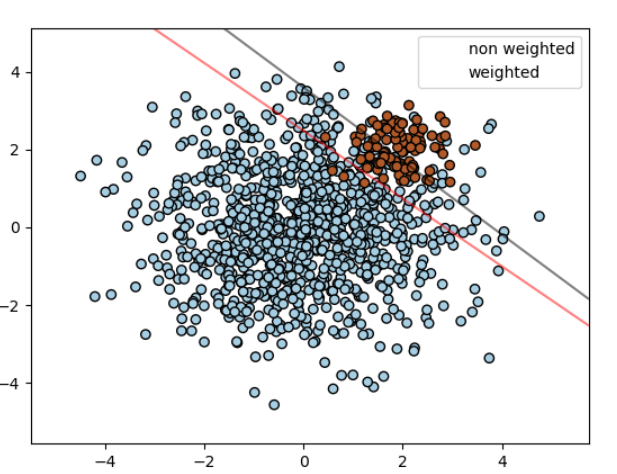

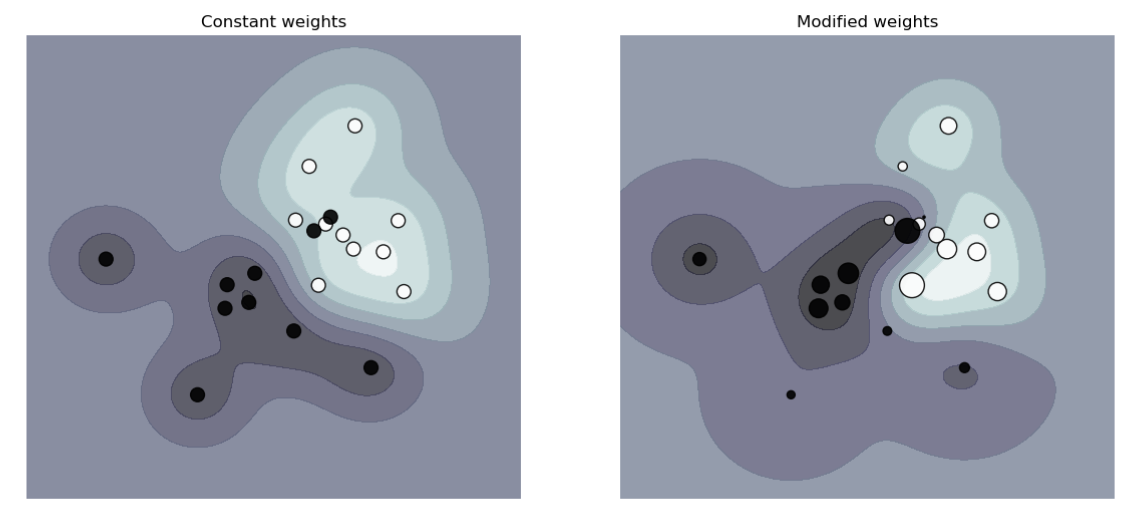

## 1.4.2 Regresión

El método de clasificación de vectores de soporte se puede extender para resolver problemas de regresión. Este método se llama Regresión de vectores de soporte.
El modelo producido por la clasificación de vectores de soporte depende solo de un subconjunto de los datos de entrenamiento, porque la función de costo para construir el modelo no se preocupa por los puntos de entrenamiento que se encuentran más allá del margen.
Hay tres implementaciones diferentes de Support Vector Regression: SVR, NuSVR y LinearSVR. LinearSVR proporciona una implementación más rápida que SVR pero solo considera el kernel lineal, mientras que NuSVR implementa una formulación ligeramente diferente a SVR y LinearSVR.
El método de ajuste tomará como argumento los vectores X, y, solo que en este caso se espera que y tenga valores de punto flotante en lugar de valores enteros:


In [ ]:
from sklearn import svm
X = [[0, 0], [2, 2]]
y = [0.5, 2.5]
regr = svm.SVR()
regr.fit(X, y)

SVR()

In [ ]:
regr.predict([[1, 1]])

array([1.5])

## 1.4.3 Estimación de densidad, detección de novedad

La clase OneClassSVM implementa una SVM de clase única que se utiliza en la detección de valores atípicos.

## 1.4.4 Complejidad

Las máquinas de vectores de soporte son herramientas poderosas, pero sus requisitos de cómputo y almacenamiento aumentan rápidamente con la cantidad de vectores de entrenamiento. El núcleo de una SVM es un problema de programación cuadrática (QP), que separa los vectores de soporte del resto de los datos de entrenamiento. 

## 1.4.5. Tips de uso práctico



*   Evitar copia de datos
*   Tamaño de caché del kernel
*   Ajuste C
*   Escalar sus datos
*   La reducción puede acortar el tiempo de entrenamiento.
*   El parámetro nu en NuSVC/OneClassSVM/NuSVR se aproxima a la fracción de errores de entrenamiento y vectores de soporte.
*   Si los datos están desequilibrados configure class_weight='balanced' y/o pruebe diferentes parámetros de penalización C.
*   Aleatoriedad de las implementaciones subyacentes.
*   El uso de la penalización L1 produce una solución escasa, es decir, solo un subconjunto de pesos de características es diferente de cero y contribuye a la función de decisión. El aumento de C produce un modelo más complejo. El valor de C que produce un modelo "nulo" se puede calcular utilizando l1_min_c.



## 1.4.6 Función Kernel

La función del kernel puede ser cualquiera de las siguientes:


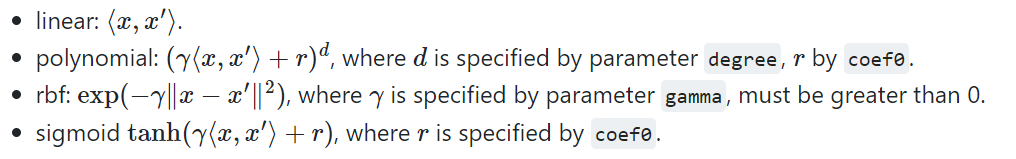

El parámetro del kernel especifica diferentes núcleos:







In [ ]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.kernel

In [ ]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel

### 1.4.6.1.Parámetros del Kernel RBF

Al entrenar una SVM con el kernel de función de base radial (RBF), se deben considerar dos parámetros: C y gamma. El parámetro C compensa la clasificación errónea de los ejemplos de entrenamiento frente a la simplicidad de la superficie de decisión. Una C baja suaviza la superficie de decisión, mientras que una C alta apunta a clasificar correctamente todos los ejemplos de entrenamiento. Gamma define cuánta influencia tiene un solo ejemplo de entrenamiento. Cuanto mayor sea gamma, más cerca deben estar otros ejemplos para verse afectados.

La elección adecuada de C y gamma es fundamental para el rendimiento de SVM. Se recomienda usar GridSearchCV con C y gamma espaciados exponencialmente para elegir buenos valores.

### 1.4.6.2. Kernel personalizado

Puede definir sus propios kernels dando el kernel como una función de python o precomputando la matriz de Gram.

Los clasificadores con núcleos personalizados se comportan de la misma manera que cualquier otro clasificador, excepto que:

*   El campo support_vectors_ ahora está vacío, solo los índices de los vectores de soporte se almacenan en support_

*   Se almacena una referencia (y no una copia) del primer argumento en el método fit() para referencia futura. Si esa matriz cambia entre el uso de fit() y predict(), tendrá resultados inesperados.

**Usar funciones de Python como kernels**
Puede usar sus propios núcleos definidos pasando una función al parámetro del núcleo.

Su kernel debe tomar como argumentos dos matrices de forma (n_samples_1, n_features), (n_samples_2, n_features) y devolver una matriz de kernel de forma (n_samples_1, n_samples_2).



**Usando la matriz de Gram**



In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn import svm
X, y = make_classification(n_samples=10, random_state=0)
X_train , X_test , y_train, y_test = train_test_split(X, y, random_state=0)
clf = svm.SVC(kernel='precomputed')
# linear kernel computation
gram_train = np.dot(X_train, X_train.T)
clf.fit(gram_train, y_train)

SVC(kernel='precomputed')

In [ ]:
# predict on training examples
gram_test = np.dot(X_test, X_train.T)
clf.predict(gram_test)

array([0, 1, 0])

## 1.4.7. Formulación matemática

Una máquina de vectores de soporte construye un hiperplano o un conjunto de hiperplanos en un espacio dimensional alto o infinito, que puede usarse para clasificación, regresión u otras tareas. Intuitivamente, una buena separación se logra con el hiperplano que tiene la mayor distancia a los puntos de datos de entrenamiento más cercanos de cualquier clase (el llamado margen funcional), ya que, en general, cuanto mayor es el margen, menor es el error de generalización del clasificador. La siguiente figura muestra la función de decisión para un problema linealmente separable, con tres muestras en los límites del margen, llamados "vectores de soporte":

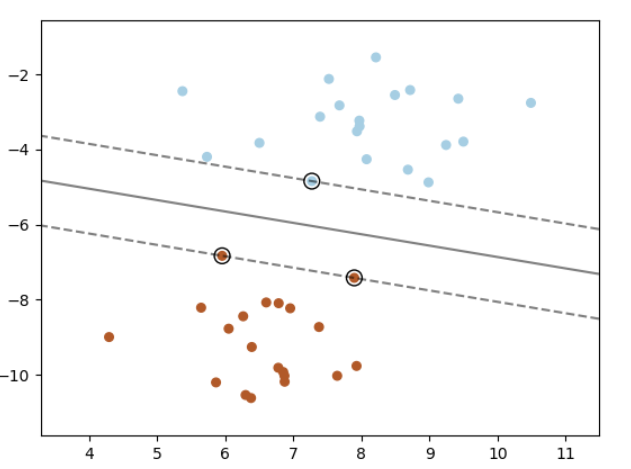

En general, cuando el problema no es linealmente separable, los vectores de soporte son las muestras dentro de los límites del margen.

### 1.4.7.1. SVC  

Dados los vectores de entrenamiento, $x_i\in \mathbb{R^p}$, $i=1,...,n$ en dos clases, y un vector $y \in \left\lbrace1,-1 \right\rbrace^n$, nuestro objetivo es encontrar $w_i\in \mathbb{R^p}$ y $b\in \mathbb{R}$ tal que la predicción dada por  $sing\left(w^T\phi\left(x\right)+b\right)$  sea correcta para la mayoría de las muestras.

SVC resuelve el siguiente problema primal:

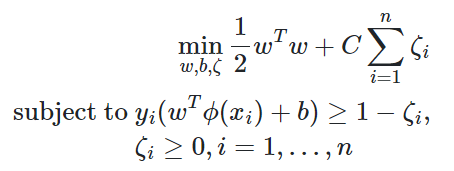

Intuitivamente, estamos tratando de maximizar el margen, al mismo tiempo que incurrimos en una penalización cuando una muestra se clasifica incorrectamente o se encuentra dentro de los límites del margen. Idealmente, el valor $y_i\left(w^T\phi\left(x\right)+b\right)$ debería ser $y\geq1$ para todas las muestras, lo que indica una predicción perfecta. Pero, por lo general, los problemas no siempre se pueden separar perfectamente con un hiperplano, por lo que permitimos que algunas muestras estén a una distancia $\zeta_i$ de su límite de margen correcto. El término de penalización C controla la fuerza de esta penalización y, como resultado, actúa como un parámetro de regularización inversa.

El problema dual al primal es:

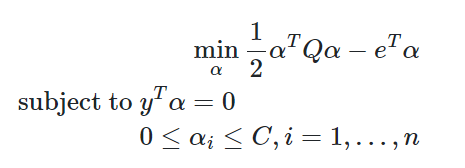

donde _e_ es el vector de todos unos, y _Q_ es una matriz semidefinida positiva, $Q_ij \equiv y_i y_j K\left(x_i, x_j\right)$ , donde $K\left(x_i, x_j\right)=\phi\left(x_i\right)^T \phi\left(x_j\right)$ es el núcleo. Los términos $\alpha_i$ se denominan coeficientes duales y tienen un límite superior acotado por _C_. Esta representación dual destaca el hecho de que los vectores de entrenamiento se asignan implícitamente a un espacio dimensional superior (quizás infinito) mediante la función $\phi$.

Una vez que se resuelve el problema de optimización, la salida de decision_function para una muestra determinada se convierte en:
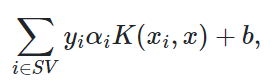





### 1.4.7.2.  SVC Lineal

El problema primal se puede formular de manera equivalente como:

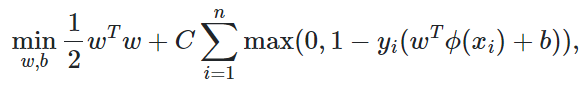

### 1.4.7.3. NuSVC

La formulación _v_-SVC  es una reparametrización de la _C_-SVC y por lo tanto matemáticamente equivalente.

### 1.4.7.4 SVR

Dados los vectores de entrenamiento $x_i\in \mathbb{R^p}$ , i=1,…, n, y un vector $y \in \mathbb{R^n}$ $\epsilon$ -SVR resuelve el siguiente problema primal:

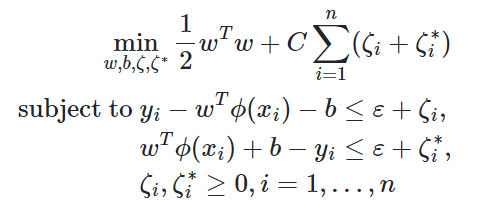

El problema dual es:

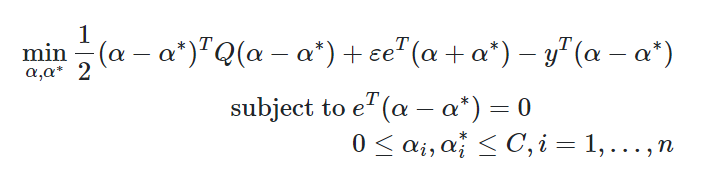

La predicción es:

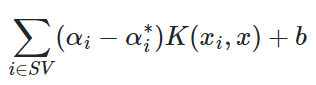




### 1.4.7.5. SVR Lineal 

El problema primal puede ser formulado como:

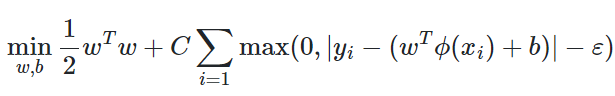

